In [1]:
import torch
import matplotlib.pyplot as plt
from torchessian import spectrum

In [8]:
class SampleNN(torch.nn.Module):
    def __init__(self, input_size):
        super(SampleNN, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 64)
        self.conv = torch.nn.Conv2d(1, 1, 3, stride=1, padding=1)
        self.fc2 = torch.nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = x.view(-1, 1, 8, 8)
        x = self.conv(x)
        x = x.view(-1, 64)
        x = self.fc2(x)
        return x

input_size = 10
m = 20
model = SampleNN(input_size)
torch.manual_seed(2019)
x = torch.rand(100, input_size)
y = x.sum(1)
def loss_function(y_hat, y):
    return ((y_hat.view(-1) - y.view(-1)) * (y_hat.view(-1) - y.view(-1))).sum() / y.numel()
batch = x, y

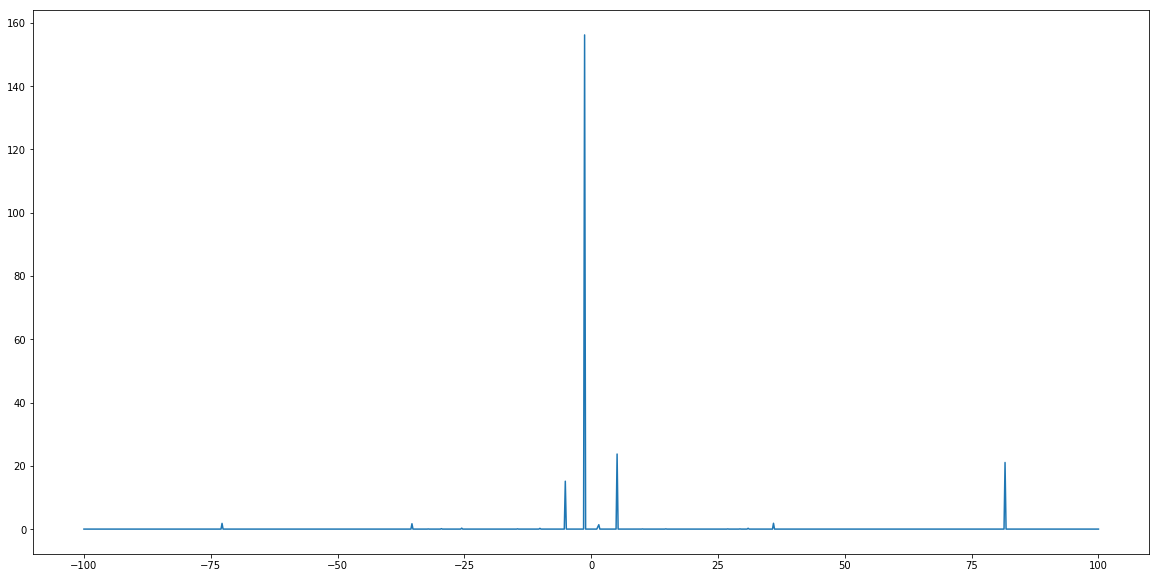

In [9]:
support, density = spectrum(model, loss_function, batch, m) 
plt.figure(figsize=(20,10))
plt.plot(support.numpy(), density.numpy())
plt.show()